## Importing libraries

In [1]:
from spacy.lang.en import English
import csv as csv
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split as split
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

## Reading and splitting

In [2]:
nlp = English()
all_labels = []
all_tweets = []

In [3]:
with open("offenseval-training-v1.tsv", encoding='utf8') as mf:
    reader = csv.reader(mf, delimiter="\t")
    for id,tweet,a,b,c in tqdm(reader,'Reading data'):
        if id == "id":
            continue
        all_tweets.append(tweet.lower())
        if a == "OFF":
            all_labels.append(1)
        else:
            all_labels.append(0)

Reading data: 13241it [00:00, 164087.65it/s]


In [4]:
print(all_tweets[0])
#print(all_labels[3])

@user she should ask a few native americans what their take on this is.


In [5]:
tr_tweets,tst_tweets,tr_labels,tst_labels = split(all_tweets,all_labels,test_size=0.3)

### Preprocessing

In [7]:
prep_tr_tweets = []
prep_tst_tweets = []
tr_vecs = []
tst_vecs = []
other_stopwords = ['.',',',':','#','-','"','!','?','*','&','@','˝',')','(',';','´',' ','/','@user']

In [8]:
for i, tweet in tqdm(enumerate(tr_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    words = []
    for j, token in enumerate(temp):
        if not token.is_stop and token.text not in other_stopwords:
            words.append((token.lemma_))
    prep_tr_tweets.append(words)
for i, tweet in tqdm(enumerate(tst_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    asd = []
    for j, token in enumerate(temp):
        if not token.is_stop and token.text not in other_stopwords:
            asd.append((token.lemma_))
    prep_tst_tweets.append(asd)

Token and Lemmatization: 9268it [00:03, 2849.50it/s]
Token and Lemmatization: 3972it [00:01, 3294.19it/s]


In [9]:
print(prep_tr_tweets[10])

['seriously', 'dick', 'unfollowed']


## Vectorizing

In [10]:
vectorizer = CountVectorizer()
data =[' '.join(tweet) for tweet in prep_tr_tweets]
vectorizer = vectorizer.fit(data)
vectors = vectorizer.transform(data).toarray()
tr_vecs.append(vectors)

In [11]:
data2 =[' '.join(tweet) for tweet in prep_tst_tweets]
vectors = vectorizer.transform(data2).toarray()
tst_vecs.append(vectors)

In [12]:
len(tst_vecs[0])

3972

## Classifiers

In [13]:
classifier = LogisticRegression
params = {'penalty':'l2','solver':'sag'}
model = classifier(**params)
model.fit(tr_vecs[0],tr_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
def confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

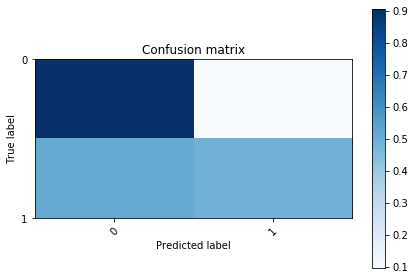

In [15]:
test_data = np.array(tst_vecs[0])
test_labels = np.array(tst_labels).reshape(-1,1)
predicted_tst_labels = model.predict(test_data)
conf = np.zeros([2,2])
confnorm = np.zeros([2,2])
for i in range(0,test_data.shape[0]):
    j = test_labels[i,:]
    k = predicted_tst_labels[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0,2):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
confusion_matrix(confnorm, labels=[i for i in range(2)])
acc = model.score(test_data,test_labels)

In [16]:
print(acc)

0.7651057401812689
